# 10.1 Spectral analysis

## Fourier series
Sinusoidal wave functions can be added together to makes waves with different properties:

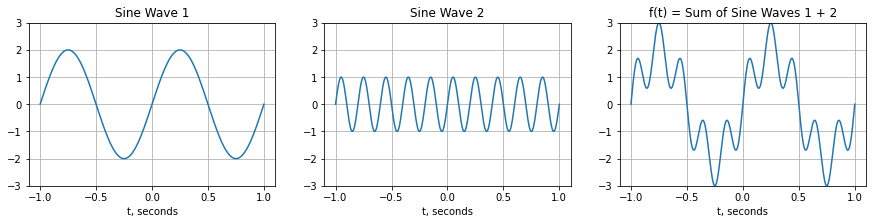

In [1]:
import numpy as np
import matplotlib.pyplot as plt

L = 1 # time interval, 1 second
t = np.linspace(-L,L,400) # time, sampled 200 times per second

# Sine wave 1
amp1 = 2
k1 = 1 # number of cycles/second
sin1=amp1*np.sin(2*np.pi*k1*t/L)

# Sine wave 2
amp2 = 1
k2 = 5 # number of cycles/second
sin2=amp2*np.sin(2*np.pi*k2*t/L)

# f(t)
f = sin1 + sin2

#Plot
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
plt.plot(t,sin1)
plt.ylim([-3, 3])
plt.grid()
plt.xlabel('t, seconds')
plt.title('Sine Wave 1')
plt.subplot(1,3,2)
plt.plot(t,sin2)
plt.ylim([-3, 3])
plt.grid()
plt.xlabel('t, seconds')
plt.title('Sine Wave 2')
plt.subplot(1,3,3)
plt.plot(t,f)
plt.ylim([-3, 3])
plt.grid()
plt.xlabel('t, seconds')
plt.title('f(t) = Sum of Sine Waves 1 + 2')
plt.show()

Any periodic function $f(t)$ can be represented as the sum of a series of sines and cosines (the Fourier Series):   

$$f(t)=a_0+ \sum_{k=1}^{\infty} \bigr[a_k    \cos  \bigr(  \frac{k \pi t}{L}  \bigr)  + b_k    \sin  \bigr( \frac{k \pi t}{L} \bigl) \bigl]  $$

Where $a_k$ and $b_k$ are the Fourier coefficients and control the amplitude of the sinusoidal wave, $-L$ to $L$ is the domain of the periodic function, $k$ is the index of the sinusoidal wave, and $\frac{k \pi}{L}$ gives the angular frequency of each wave. Each $k$th-wave has a different amplitude and frequency, higher $k$ waves have higher frequency. For example, "Sine Wave 1" in the coded example above has a larger amplitude and "Sine Wave 2" has a higher frequency. 

**Watch these videos from Khan Academy:**

[![](http://img.youtube.com/vi/UKHBWzoOKsY/0.jpg)](http://www.youtube.com/watch?v=UKHBWzoOKsY "")

[![](http://img.youtube.com/vi/aalANrz7bi8/0.jpg)](http://www.youtube.com/watch?v=aalANrz7bi8 "")

![](./images/Fourier_series_and_transform.gif)
> .gif from [Wikipedia](https://en.wikipedia.org/wiki/Fourier_series) illustrating a Fourier Series representation of a square wave function. The function (red, S(x)) is the sum of 6 sine functions with different amplitudes and frequencies. The Fourier transform (blue spikes, S(f)) shows the amplitude of the 6 frequencies.


## Fourier transform and power spectum

You can represent data as a series in time (in the time-domain) as we have been doing OR you can represent the data in terms of frequency (frequency-domain). This is called a _Fourier transform_ and is illustrated in the .gif above. 

The Fourier series is:

$$f(t)=a_0+ \sum_{k=1}^{\infty} \bigr[a_k    \cos  \bigr(  \frac{k \pi t}{L}  \bigr)  + b_k    \sin  \bigr( \frac{k \pi t}{L} \bigl) \bigl]  = \sum_{k=-\infty}^{\infty} c_k e^{ik\pi t/L}   $$ 

with the coefficients are given by:

$$ c_k = \frac{1}{2L}\int_{-L}^{L}f(t)e^{-ik\pi t/L} dt$$

This is the discrete Fourier series, i.e. a discrete number of $k$ frequencies $\left ( \omega_k = k\pi/L  \right )$ are used to represent $f(t)$. By taking the the limits $L \rightarrow \infty$ and $\Delta \omega \rightarrow$ 0, the discrete frequencies become continuous $\left ( \omega = k\pi/L  \right )$. Making the Fourier series continuous results in:

$$ f(t) = \mathfrak{F}^{-1}\left ( \hat{f}(\omega) \right )= \frac{1}{2\pi}\int_{-\infty}^{\infty}\hat{f}(\omega) e^{i \omega t} d\omega$$

$$\hat{f}(\omega) = \mathfrak{F}\left ( f(t) \right )= \int_{-\infty}^{\infty}f(t) e^{-i \omega t} dt$$

These two integrals are the Fourier transform pair and describe how we can move betweem time-domain and frequency-domain.

To compute a Fourier transform we will use the _fast Fourier transform_ (fft). We will use the `scipy.fft` package, specifically `fft` to compute the Fourier transform, `fftfreq` to compute the frequencies, and `fftshift` to put the coefficients in the right order. The fft algorithm is fast because it groups the odd and even Fourier coefficients, so they will be in a non-numerical order.

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


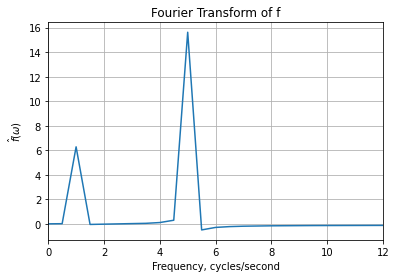

In [2]:
from scipy.fft import fft, fftfreq, fftshift

FT_f = fft(f)
freq = fftfreq(400, 1/200)

plt.plot(fftshift(freq), fftshift(FT_f))
plt.title('Fourier Transform of f')
plt.xlabel('Frequency, cycles/second')
plt.ylabel('$\hat{f}(\omega)$') 
plt.xlim([0, 12])
plt.grid()
plt.show()

Another useful way of visualizing the frequenecy content of our time-series data is to plot the _power_ in the data as a function of frequency.  This is known as the _power spectrum_. 

There are entire courses devoted to the subject of _time series analysis_ and a complete treatment is beyond the scope of this class, but we can begin to answer the basic question: *Do the two data sets have wiggles with the same frequencies?*

To compute the _power spectral density_ for a time series we will use the `signal.periodogram` function in the `scipy` package.  As a result we will be able to generate a _periodogram_, which is a plot of power versus frequency. 

We will also use a _window_ in the periodogram calculation.  What a _window_ does is multiply the time series by a function (called a taper) that weights information, suppressing data at the edges of the window and focussing on the center of the window.  The simplest window is a _box car_ which gives equal weight to everything inside the window.  In the following, we will use a _Hann window_ which looks more like a bell curve. You can check it out here: https://en.wikipedia.org/wiki/Window_function

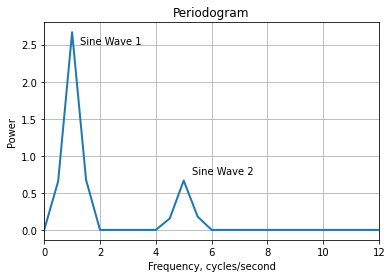

In [3]:
from scipy import signal

freqs,power = signal.periodogram(f,fs=200,window='hann')

plt.plot(freqs,power,linewidth=2)
plt.title('Periodogram')
plt.xlabel('Frequency, cycles/second')
plt.ylabel('Power') 
plt.grid()
plt.xlim([0, 12])
plt.text(1.3,2.5,'Sine Wave 1')
plt.text(5.3,0.75,'Sine Wave 2')
plt.show()

Peaks in the power spectrum show the fundamental frequencies present in your signal.